In [16]:
from Bio import SeqIO
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [17]:
# Step 1: Load the GenBank file
genbank_file = "Bacillus clausii.gb" # Replace with the path to your GenBank file
assert genbank_file.endswith(".gb"), "The file is not a GenBank file"

with open(genbank_file, "r") as file:
    # Read the file and parse it using SeqIO
    for i, record in enumerate(SeqIO.parse(file, "genbank")):
        # Iterate over features in each record
        print(f"Record number {i} has {len(record.features)} features")

gen = SeqIO.parse(genbank_file, "genbank")
genbank_file_info = next(gen) 

#print the name of the organism
print(genbank_file_info.annotations['organism'])
organism_name = genbank_file_info.annotations['organism']

Record number 0 has 8434 features
Bacillus clausii KSM-K16


סעיף 1. הכרת וספירת האלמנטים בגנום

In [18]:
# Lets find out the number of features in the genbank file

# Initialize a dictionary to store counts of different elements
elements_count = {}

# Iterate over features in each record
for feature in genbank_file_info.features:
    # Get the type of the feature
    feature_type = feature.type
    # Increment the count for this feature type in the dictionary
    elements_count[feature_type] = elements_count.get(feature_type, 0) + 1

# Print the counts of different elements
for element_type, count in elements_count.items():
    print(f"Number of {element_type}: {count}")

Number of source: 1
Number of gene: 4203
Number of CDS: 4108
Number of rRNA: 22
Number of tRNA: 73
Number of misc_feature: 27


סעיף 2. אפיון אורכי הגנים בין שני הסטרנדים

Number of genes on plus strand: 2074
Number of genes on minus strand: 2129
Bacillus clausii KSM-K16


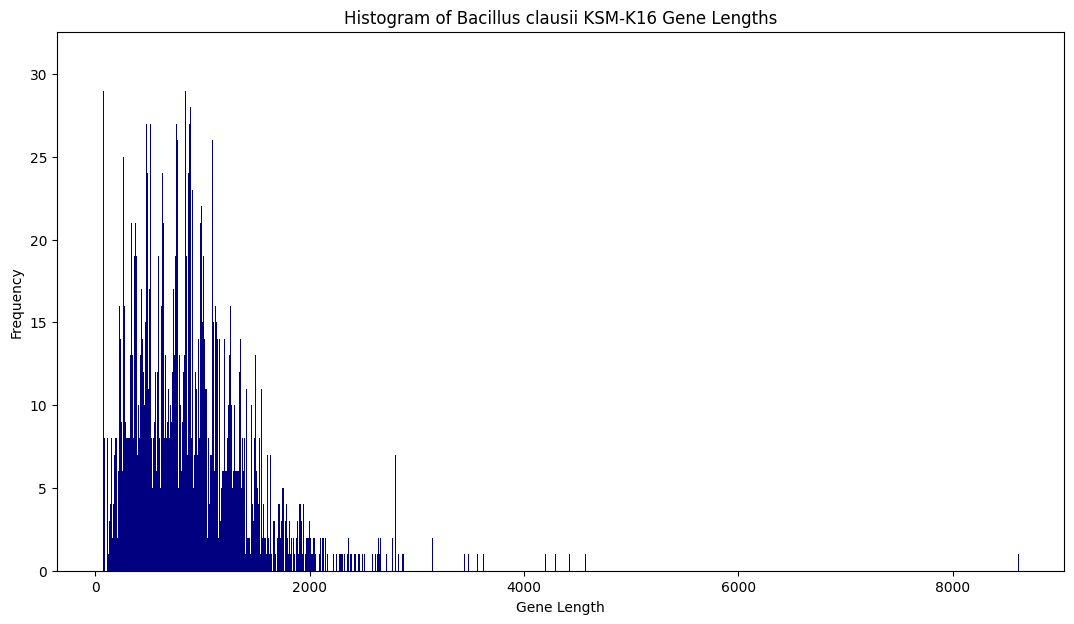

In [19]:
# Plot a histogram of gene lengths of the record 

# Initialize variables to store gene lengths and counts
gene_lengths = []
plus_strand_genes = 0
minus_strand_genes = 0

def get_gene_length(feature):
    return abs(feature.location.end - feature.location.start)

def get_strand(feature):
    return feature.location.strand

# Iterate over features in each record and store gene lengths and counts of genes on different strands
for feature in genbank_file_info.features:
    if feature.type == "gene":
        gene_length = get_gene_length(feature)
        gene_lengths.append(gene_length)
        if get_strand(feature) == 1:
            plus_strand_genes += 1
        elif get_strand(feature) == -1:
            minus_strand_genes += 1

# Print the number of genes on different strands
print(f"Number of genes on plus strand: {plus_strand_genes}")
print(f"Number of genes on minus strand: {minus_strand_genes}")

#print the name of the organism
print(genbank_file_info.annotations['organism'])

# Plot histogram of gene lengths
plt.figure(figsize=(13,7))
plt.hist(gene_lengths, bins=2000, color='navy')
plt.xlabel('Gene Length')
plt.ylabel('Frequency')
plt.title('Histogram of ' + organism_name + ' Gene Lengths')
plt.show()

Number of genes on plus strand: 2074
Number of genes on minus strand: 2129
Number of protein coding genes on plus strand: 1998
Number of protein coding genes on minus strand: 2110


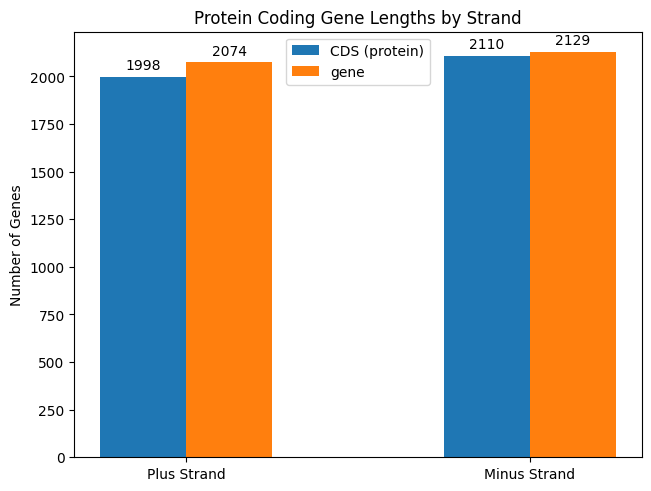

In [20]:
protein_coding_genes_minus_lengths = []
protein_coding_genes_plus_lengths = []
protein_coding_genes_minus_strand = 0
protein_coding_genes_plus_strand = 0

# Iterate over features in each record and store gene lengths and counts of genes on different strands
for feature in genbank_file_info.features:
    if feature.type == "CDS":
        gene_length = get_gene_length(feature)
        if get_strand(feature) == 1:
            protein_coding_genes_plus_lengths.append(gene_length)
            protein_coding_genes_plus_strand += 1
        elif get_strand(feature) == -1:
            protein_coding_genes_minus_lengths.append(gene_length)
            protein_coding_genes_minus_strand += 1

print(f"Number of genes on plus strand: {plus_strand_genes}")
print(f"Number of genes on minus strand: {minus_strand_genes}")
print(f"Number of protein coding genes on plus strand: {protein_coding_genes_plus_strand}")
print(f"Number of protein coding genes on minus strand: {protein_coding_genes_minus_strand}")

strands = ("Plus Strand", "Minus Strand")
length_per_strand = {
    'CDS (protein)': (protein_coding_genes_plus_strand, protein_coding_genes_minus_strand),
    'gene': (plus_strand_genes, minus_strand_genes)
}

x = np.arange(len(strands))
width = 0.25
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in length_per_strand.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_ylabel('Number of Genes')
ax.set_title('Protein Coding Gene Lengths by Strand')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(strands)
ax.legend(loc = 'upper center')
plt.show()




In [21]:
# This method processes the genes in the genbank file and plots histograms of gene lengths by strand and gene type
def process_genes(genbank_file_info, gene_type, organism_name, plus_lengths, minus_lengths):
    for feature in genbank_file_info.features:
        if feature.type == gene_type:
            gene_length = get_gene_length(feature)
            if get_strand(feature) == 1:
                plus_lengths.append(gene_length)
            elif get_strand(feature) == -1:
                minus_lengths.append(gene_length)

    print(f"Number of {gene_type} genes on plus strand: {len(plus_lengths)}")
    print(f"Number of {gene_type} genes on minus strand: {len(minus_lengths)}")
    
    if len(plus_lengths) == 0 and len(minus_lengths) == 0:
        min_range = 0
        max_range = 0
    elif len(plus_lengths) == 0:
        min_range = min(minus_lengths)
        max_range = max(minus_lengths)
    elif len(minus_lengths) == 0:
        min_range = min(plus_lengths)
        max_range = max(plus_lengths)
    else:
        min_range = min(min(minus_lengths), min(plus_lengths)) 
        max_range = max(max(minus_lengths), max(plus_lengths))

    # Plot histograms
    fig, ax = plt.subplots(2, 1, figsize=(13,7))
    ax[0].hist(plus_lengths, bins=100 if gene_type == "CDS" else 50 if gene_type == "tRNA" else 20, color='navy', edgecolor='black', range=(min_range, max_range))
    ax[0].set_xlabel(f'Gene Length on Plus Strand ({gene_type})')
    ax[0].set_ylabel('Frequency')
    ax[0].set_title(f'Histogram of {organism_name} {gene_type} Gene Lengths on Plus Strand')

    ax[1].hist(minus_lengths, bins=100 if gene_type == "CDS" else 50 if gene_type == "tRNA" else 20, color='navy', edgecolor='black', range=(min_range, max_range))
    ax[1].set_xlabel(f'Gene Length on Minus Strand ({gene_type})')
    ax[1].set_ylabel('Frequency')
    ax[1].set_title(f'Histogram of {organism_name} {gene_type} Gene Lengths on Minus Strand')

    plt.tight_layout()
    plt.show()

Number of CDS genes on plus strand: 1998
Number of CDS genes on minus strand: 2110


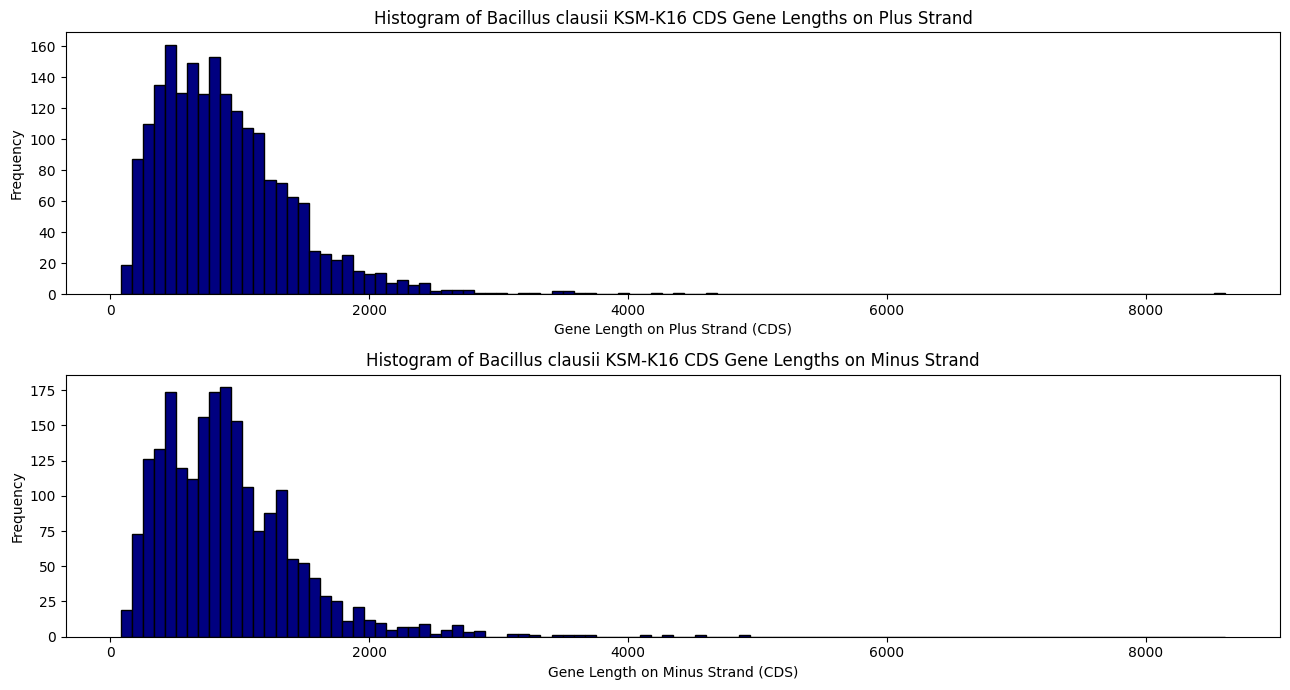

In [22]:
# For genes translated to protein, plot histograms of gene lengths by strand
plus_strand_cdn_lengths = []
minus_strand_cdn_lengths = []
process_genes(genbank_file_info, "CDS", organism_name, plus_strand_cdn_lengths, minus_strand_cdn_lengths)

We can see that the CDS gene on both the plus and minus strands share the same statistical distribution of lengths.

In [23]:
# Defining methods to calculate gene statistics

# This method calculates the mean, standard deviation, minimum and maximum of gene lengths
def calculate_gene_statistics(lengths):
    characteristics = {'min': 0, 'max': 0, 'mean': 0, 'std': 0}
    if(len(lengths) > 0):
        characteristics['min'] = np.min(lengths)
        characteristics['max'] = np.max(lengths)
        characteristics['mean'] = np.mean(lengths)
        characteristics['std'] = np.std(lengths)
    else:
        characteristics['min'] = 0
        characteristics['max'] = 0
        characteristics['mean'] = 0
        characteristics['std'] = 0   
    return characteristics

# This method prints the statistics of gene lengths
def print_gene_statistics(gene_type, plus_characteristics, minus_characteristics):
    df = pd.DataFrame({
        'Strand': ['Plus', 'Minus'],
        'Min': [plus_characteristics['min'], minus_characteristics['min']],
        'Max': [plus_characteristics['max'], minus_characteristics['max']],
        'Mean': [round(plus_characteristics['mean'], 3), round(minus_characteristics['mean'], 3)],
        'Std': [round(plus_characteristics['std'], 3), round(minus_characteristics['std'], 3)]
    })

    print(f"Statistics for {gene_type} coding genes")
    print(df.to_string(index=False))

In [24]:
# Calculating statistics for protein coding genes
protein_coding_genes_plus_characteristics = calculate_gene_statistics(protein_coding_genes_plus_lengths)
protein_coding_genes_minus_characteristics = calculate_gene_statistics(protein_coding_genes_minus_lengths)
print_gene_statistics("protein coding", protein_coding_genes_plus_characteristics, protein_coding_genes_minus_characteristics)

Statistics for protein coding coding genes
Strand  Min  Max    Mean     Std
  Plus  102 8613 900.657 565.016
 Minus   81 4896 908.709 535.217


Number of tRNA genes on plus strand: 54
Number of tRNA genes on minus strand: 19


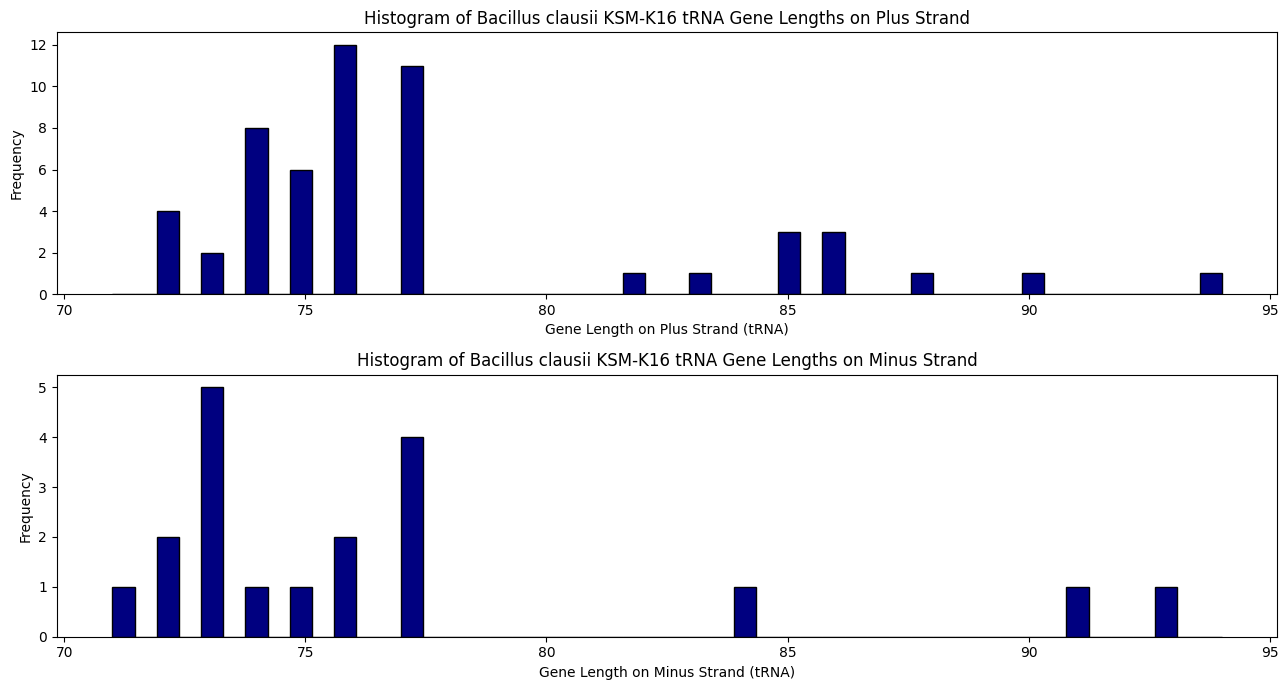

Statistics for tRNA coding genes
Strand  Min  Max   Mean   Std
  Plus   72   94 77.500 4.909
 Minus   71   93 76.684 5.983


In [25]:
# For genes translated to tRNA, plot histograms of gene lengths by strand
plus_strand_tRNA_lengths = []
minus_strand_tRNA_lengths = []
process_genes(genbank_file_info, "tRNA", organism_name, plus_strand_tRNA_lengths, minus_strand_tRNA_lengths)

# Calculating statistics for tRNA genes
tRNA_genes_plus_characteristics = calculate_gene_statistics(plus_strand_tRNA_lengths)
tRNA_genes_minus_characteristics = calculate_gene_statistics(minus_strand_tRNA_lengths)
print_gene_statistics("tRNA", tRNA_genes_plus_characteristics, tRNA_genes_minus_characteristics)

Number of rRNA genes on plus strand: 22
Number of rRNA genes on minus strand: 0


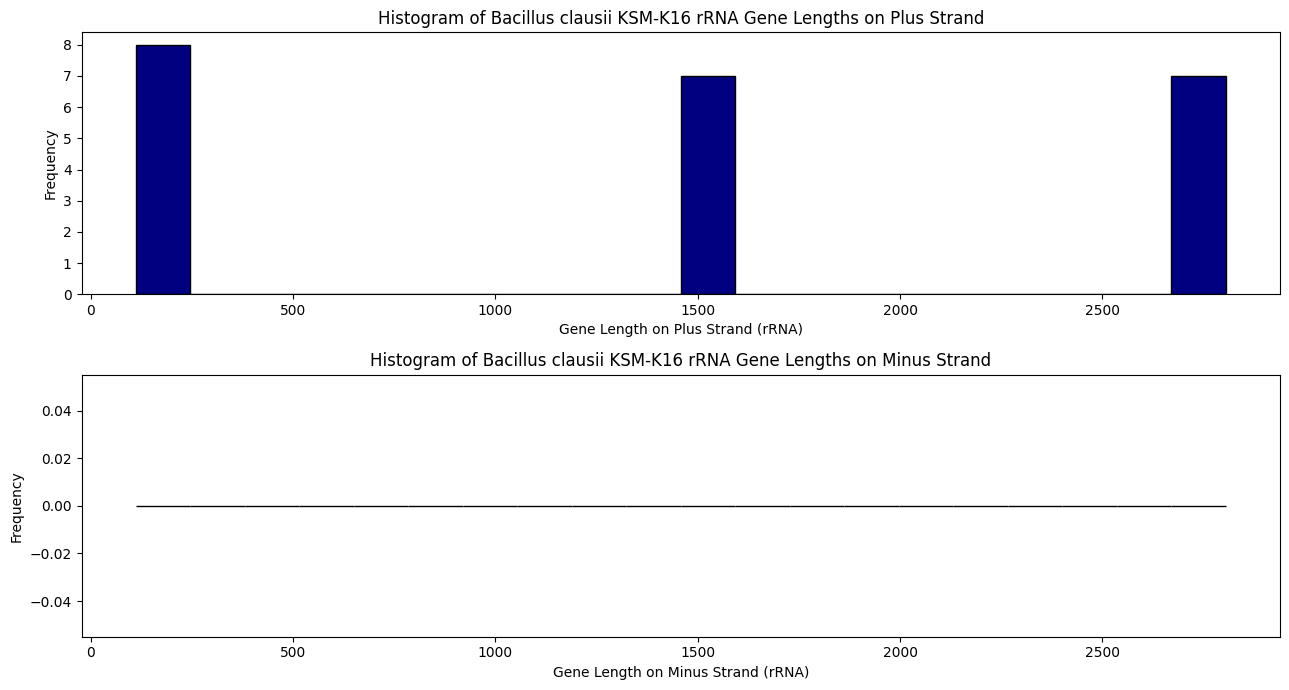

Statistics for rRNA coding genes
Strand  Min  Max     Mean      Std
  Plus  112 2804 1427.682 1110.503
 Minus    0    0    0.000    0.000


In [26]:
# For genes translated to rRNA, plot histograms of gene lengths by strand
plus_strand_rRNA_lengths = []
minus_strand_rRNA_lengths = []
process_genes(genbank_file_info, "rRNA", organism_name, plus_strand_rRNA_lengths, minus_strand_rRNA_lengths)

# Calculating statistics for rRNA genes
rRNA_genes_plus_characteristics = calculate_gene_statistics(plus_strand_rRNA_lengths)
rRNA_genes_minus_characteristics = calculate_gene_statistics(minus_strand_rRNA_lengths)
print_gene_statistics("rRNA", rRNA_genes_plus_characteristics, rRNA_genes_minus_characteristics)

סעיף 3. חישוב אחוז הנוקלאוטידים בגנים

In [27]:
# Reporting the C and T nucleotides in the sequence
nucleotide_count = {}
nucleotide_count['C'] = genbank_file_info.seq.upper().count('C')
nucleotide_count['T'] = genbank_file_info.seq.upper().count('T')

print(f"Number of C nucleotides: {nucleotide_count['C']}")
print(f"Number of T nucleotides: {nucleotide_count['T']}")
print(f"Ratio of C to T: {nucleotide_count['C'] / nucleotide_count['T']:.2f}")

Number of C nucleotides: 965102
Number of T nucleotides: 1189975
Ratio of C to T: 0.81


In [28]:
# For each CDS, calculate the T C content and print the average for all CDS
c_t_contents = []
for feature in genbank_file_info.features:
    if feature.type == "CDS":
        cds = genbank_file_info.seq[feature.location.start:feature.location.end].upper()
        c_t_contents.append((cds.count('T') + cds.count('C')) / len(cds))

print(f"Average C and T content of CDS: {np.mean(c_t_contents):.2f}")

Average C and T content of CDS: 0.50


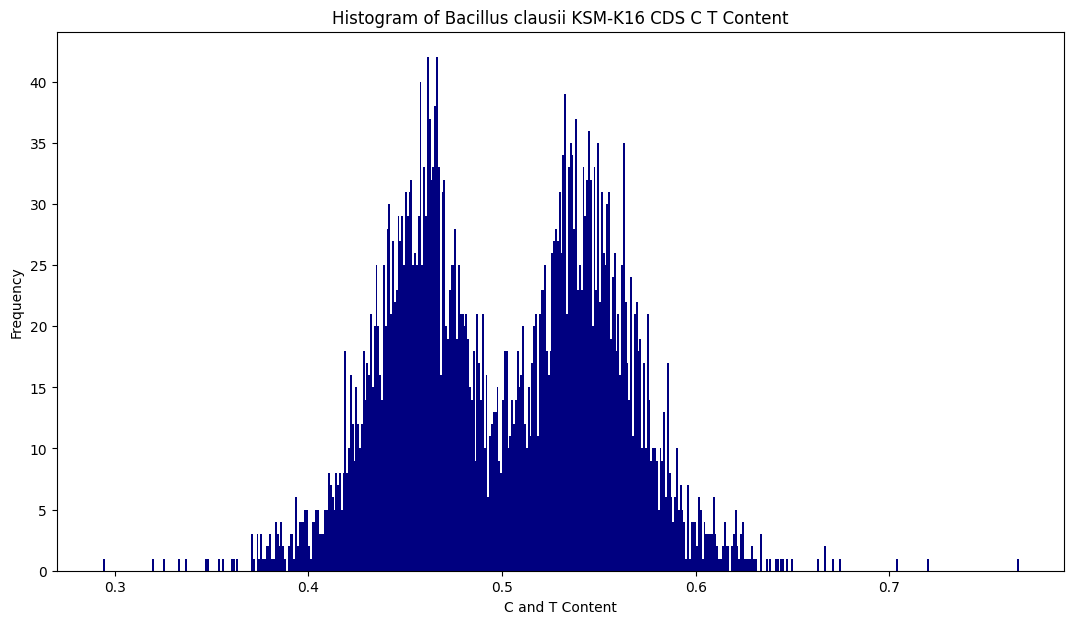

In [29]:
# Plot a histogram for the C and T content of CDS 
plt.figure(figsize=(13,7))
plt.hist(c_t_contents, bins=500, color='navy')
plt.xlabel('C and T Content')
plt.ylabel('Frequency')
plt.title('Histogram of ' + organism_name + ' CDS C T Content')
plt.show()




In [30]:
# Locating the 5 richest CDS genes that has the highest C and T content and the poorest 5 CDS genes that has the lowest C and T content
# provide me the following information: gene name, start index, end index, and the C and T content of the gene

#start by defining a class to store the gene information
def gene_info(name, start, end, strand, C_T_content):
    return {'name': name, 'start': start, 'end': end, 'strand' : strand, 'C_T_content_by_percent': C_T_content}

#initialize a list to store the gene information
gene_info_list = []

#iterate over the CDS features and store the gene information
for feature in genbank_file_info.features:
    if feature.type == "CDS":
        cds = genbank_file_info.seq[feature.location.start:feature.location.end].upper()
        if 'gene' in feature.qualifiers: #check if gene name is available - there are some CDS features without gene name
            gene_name = feature.qualifiers['gene'][0]
        else:
            gene_name = 'Gene name not available, locus tag: ' + feature.qualifiers['locus_tag'][0]
        gene_info_list.append(gene_info(gene_name, int(feature.location.start), int(feature.location.end), feature.location.strand, round(float((cds.count('T') + cds.count('C')) / len(cds)),2)))

#sort the gene information list by the C and T content
gene_info_list.sort(key=lambda x: x['C_T_content_by_percent'])

#report the 5 richest and poorest CDS genes
print('5 richest CDS genes with the highest C and T nucleotide content')
for gene in gene_info_list[-5:]:
    print(gene)

print('\n5 poorest CDS genes with the lowest C and T nucleotide content')
for gene in gene_info_list[:5]:
    print(gene)

5 richest CDS genes with the highest C and T nucleotide content
{'name': 'Gene name not available, locus tag: ABC3680', 'start': 3836971, 'end': 3837355, 'strand': -1, 'C_T_content_by_percent': 0.67}
{'name': 'Gene name not available, locus tag: ABC3803', 'start': 3963886, 'end': 3964210, 'strand': -1, 'C_T_content_by_percent': 0.67}
{'name': 'Gene name not available, locus tag: ABC2100', 'start': 2221887, 'end': 2222022, 'strand': -1, 'C_T_content_by_percent': 0.7}
{'name': 'Gene name not available, locus tag: ABC3192', 'start': 3313898, 'end': 3314048, 'strand': -1, 'C_T_content_by_percent': 0.72}
{'name': 'Gene name not available, locus tag: ABC3162', 'start': 3285891, 'end': 3286071, 'strand': -1, 'C_T_content_by_percent': 0.77}

5 poorest CDS genes with the lowest C and T nucleotide content
{'name': 'Gene name not available, locus tag: ABC1762', 'start': 1882854, 'end': 1883031, 'strand': 1, 'C_T_content_by_percent': 0.29}
{'name': 'Gene name not available, locus tag: ABC1314', 's

In [34]:
# Create a file to store data from features of the GenBank file
output_file = "part_a.csv"

# Create a DataFrame to store the data from the GenBank file
data = pd.DataFrame(columns=["Start", "End", "Strand", "Type", "Gene", "Locus Tag", "Product", "Protein ID", "CTPercentage"])

# Iterate over features in each record and store the data in the DataFrame
for feature in genbank_file_info.features:
    if feature.type != "source" and feature.type != "gene":
        start = feature.location.start
        end = feature.location.end
        strand = feature.location.strand
        feature_type = feature.type
        gene = feature.qualifiers.get('gene', ["MISSING-DATA"])[0]
        locus_tag = feature.qualifiers.get('locus_tag', ["MISSING-DATA"])[0]
        product = feature.qualifiers.get('product', ["MISSING-DATA"])[0]
        protein_id = feature.qualifiers.get('protein_id', ["MISSING-DATA"])[0]
        sequence = genbank_file_info.seq[start:end].upper()
        ct_percentage = round((sequence.count('C') + sequence.count('T')) / len(sequence), 2)
        data = pd.concat([data, pd.DataFrame({"Start": [start], "End": [end], "Strand": [strand], "Type": [feature_type], "Gene": [gene], "Locus Tag": [locus_tag], "Product": [product], "Protein ID": [protein_id], "CTPercentage": [ct_percentage]})], ignore_index=True)

# sort the data by the start index
data = data.sort_values(by='Start')

# Save the data to a CSV file
data.to_csv(output_file, index=False)

print(f"Data saved to {output_file}")

C:\Users\Ido\AppData\Local\Temp\ipykernel_25604\3893988901.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, pd.DataFrame({"Start": [start], "End": [end], "Strand": [strand], "Type": [feature_type], "Gene": [gene], "Locus Tag": [locus_tag], "Product": [product], "Protein ID": [protein_id], "CTPercentage": [ct_percentage]})], ignore_index=True)


Data saved to part_a.csv
